In [177]:
import pandas as pd
import nltk
import random
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("sms-spam-collection-dataset/spam.csv", encoding='latin-1')
data_labels = data

In [28]:
data = data[['v1', 'v2']] 

In [9]:
i=0
documents = []
while i < int(data.shape[0]):
    documents.append((data.iloc[i][0], data.iloc[i][1].split()))
    i+=1

In [20]:
#shuffling as to not get bias data
random.shuffle(documents)

In [95]:
#Function that turns spam-ham dataset to 0-1 table

labels = data_labels[['v1']]
span_ham_list = []
for i in labels.values:
    span_ham_list.extend(i)
    
def spam_ham_converter(lst):
    new_a = np.array([])
    for i in lst:
        if i == 'ham':
            new_a = np.concatenate((new_a, np.array([0])))
            continue
        new_a = np.concatenate((new_a, np.array([1])))
    return new_a.reshape(5572,1)

spam_ham_list = spam_ham_converter(span_ham_list)
Y = spam_ham_list
Y            

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [11]:
every_word = []
for j in data["v2"]:
    j = j.lower()
    split_word= j.split()
    every_word.extend(split_word)


In [12]:
#Frequency distribution in NLTK to remove useless words
every_word=nltk.FreqDist(every_word)

In [115]:
word_features = [x[0] for x in every_word.most_common(1500)]

In [114]:
def find_features(d):
    array = np.array([w in d for w in word_features])
    return array

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [119]:
features_set = np.array([])
for m in data["v2"]:
    features_set = np.append(features_set, find_features(m))

In [123]:
features_set = features_set.reshape(5572, 1500)

In [146]:
##TRAINING TIME

##Separate Data
X_train, X_test, Y_train, Y_test = train_test_split(features_set,Y,test_size=0.10)

lg = LogisticRegression()
lg.fit(X_train, Y_train)

def error(actual_y, predict_y):
    actual_y = actual_y.reshape(predict_y.shape[0],)
    counter = 0
    for i in range(predict_y.shape[0]):
        if actual_y[i] != predict_y[i]:
            counter += 1
    return counter/predict_y.shape[0]

C:\Users\Rafael Martinez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rafael Martinez\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [158]:
# Fit your model on the training set
Y_fitted = lg.predict(X_train)

# Predict housing prices on the test set
Y_pred = lg.predict(X_test)


train_error = error(Y_train, Y_fitted)

test_error = error(Y_test, Y_pred)

print("Accuracy of model for testing data: " + str(1-test_error))
print("Accuracy of model for training data: " + str(1-train_error))

Accuracy of model for testing data: 0.985663082437276
Accuracy of model for training data: 0.995811727163941


([array([4369.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          645.]),
  array([4352.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          662.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

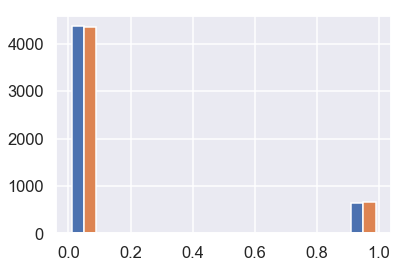

In [178]:
plt.hist([Y_fitted, Y_train.reshape(Y_fitted.shape[0],)])

([array([479.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  79.]),
  array([473.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  85.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

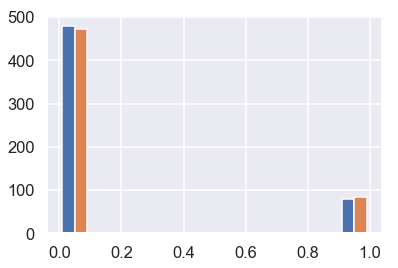

In [179]:
plt.hist([Y_pred, Y_test.reshape(Y_pred.shape[0],)])